# Window Functions
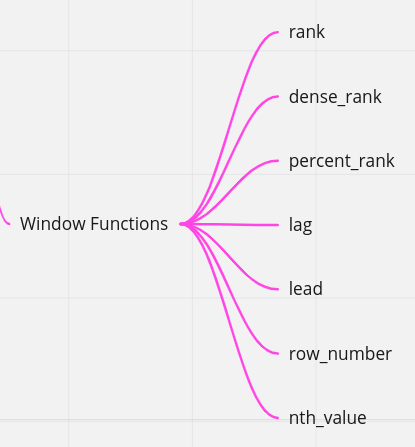

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Window

# Create SparkSession
spark = (SparkSession.builder
                    .appName('PySparkSyntax')
                    .getOrCreate()
        )

# criar um DataFrame exemplo
data = [("João", "Vendedor", 15000),
        ("Maria", "Analista", 20000),
        ("Pedro", "Vendedor", 15000),
        ("Andrey", "Vendedor", 11000),
        ("Luan", "Vendedor", 12000),
        ("Bruna", "Vendedor", 13000),
        ("Ana", "Gerente", 25000),
        ("Paulo", "Analista", 18000),
        ("Lucas", "Vendedor", 10000)]

df = spark.createDataFrame(data, ["nome", "cargo", "salario"])

In [2]:
window = Window.partitionBy("cargo").orderBy('cargo', 'salario')


## [rank](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.rank.html#pyspark.sql.functions.rank)

rank() → pyspark.sql.column.Column

Window function: returns the rank of rows within a window partition.

In [3]:
df_rank = df.withColumn("rank", F.rank().over(window))

df_rank.show()

+------+--------+-------+----+
|  nome|   cargo|salario|rank|
+------+--------+-------+----+
| Paulo|Analista|  18000|   1|
| Maria|Analista|  20000|   2|
|   Ana| Gerente|  25000|   1|
| Lucas|Vendedor|  10000|   1|
|Andrey|Vendedor|  11000|   2|
|  Luan|Vendedor|  12000|   3|
| Bruna|Vendedor|  13000|   4|
|  João|Vendedor|  15000|   5|
| Pedro|Vendedor|  15000|   5|
+------+--------+-------+----+



## [dense_rank](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.dense_rank.html#pyspark.sql.functions.dense_rank)

dense_rank() → pyspark.sql.column.Column

Window function: returns the rank of rows within a window partition, without any gaps.


No PySpark, rank e dense_rank são duas funções de janela que são usadas para atribuir uma classificação a cada linha em um conjunto de dados com base em uma coluna específica. Ambas as funções pertencem ao módulo pyspark.sql.functions e são usadas em conjunto com a função Window do módulo pyspark.sql.Window. Elas diferem na maneira como tratam valores iguais (empates) no conjunto de dados.

rank:
A função rank atribui uma classificação única a cada valor distinto, mas deixa lacunas nos rankings em caso de empates. Quando dois ou mais valores são iguais, todos recebem a mesma classificação, e a próxima classificação atribuída será incrementada pelo número de empates.
Exemplo: Se os valores são [10, 20, 20, 30], suas classificações usando rank serão [1, 2, 2, 4].

dense_rank:
A função dense_rank também atribui uma classificação única a cada valor distinto, mas não deixa lacunas nos rankings em caso de empates. Quando dois ou mais valores são iguais, todos recebem a mesma classificação, e a próxima classificação atribuída será incrementada apenas por 1, independentemente do número de empates.
Exemplo: Se os valores são [10, 20, 20, 30], suas classificações usando dense_rank serão [1, 2, 2, 3].

In [4]:
df_rank = df_rank.withColumn("dense_rank", F.dense_rank().over(window))

df_rank.show()

+------+--------+-------+----+----------+
|  nome|   cargo|salario|rank|dense_rank|
+------+--------+-------+----+----------+
| Paulo|Analista|  18000|   1|         1|
| Maria|Analista|  20000|   2|         2|
|   Ana| Gerente|  25000|   1|         1|
| Lucas|Vendedor|  10000|   1|         1|
|Andrey|Vendedor|  11000|   2|         2|
|  Luan|Vendedor|  12000|   3|         3|
| Bruna|Vendedor|  13000|   4|         4|
|  João|Vendedor|  15000|   5|         5|
| Pedro|Vendedor|  15000|   5|         5|
+------+--------+-------+----+----------+



## [percent_rank](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.percent_rank.html#pyspark.sql.functions.percent_rank)
percent_rank() → pyspark.sql.column.Column

Window function: returns the relative rank (i.e. percentile) of rows within a window partition

In [5]:
df_rank = df_rank.withColumn("percent_rank", F.percent_rank().over(window))

df_rank.show()

+------+--------+-------+----+----------+------------+
|  nome|   cargo|salario|rank|dense_rank|percent_rank|
+------+--------+-------+----+----------+------------+
| Paulo|Analista|  18000|   1|         1|         0.0|
| Maria|Analista|  20000|   2|         2|         1.0|
|   Ana| Gerente|  25000|   1|         1|         0.0|
| Lucas|Vendedor|  10000|   1|         1|         0.0|
|Andrey|Vendedor|  11000|   2|         2|         0.2|
|  Luan|Vendedor|  12000|   3|         3|         0.4|
| Bruna|Vendedor|  13000|   4|         4|         0.6|
|  João|Vendedor|  15000|   5|         5|         0.8|
| Pedro|Vendedor|  15000|   5|         5|         0.8|
+------+--------+-------+----+----------+------------+



## [lag](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.lag.html#pyspark.sql.functions.lag)
lag(col: ColumnOrName, offset: int = 1, default: Optional[Any] = None) → pyspark.sql.column.Column

Window function: returns the value that is offset rows before the current row, and default if there is less than offset rows before the current row. For example, an offset of one will return the previous row at any given point in the window partition.

In [6]:
df_rank = (df_rank.withColumn("lag", F.lag('nome').over(window))
                   .withColumn("lag2", F.lag('nome', 2).over(window))
          )

df_rank.show()

+------+--------+-------+----+----------+------------+------+------+
|  nome|   cargo|salario|rank|dense_rank|percent_rank|   lag|  lag2|
+------+--------+-------+----+----------+------------+------+------+
| Paulo|Analista|  18000|   1|         1|         0.0|  null|  null|
| Maria|Analista|  20000|   2|         2|         1.0| Paulo|  null|
|   Ana| Gerente|  25000|   1|         1|         0.0|  null|  null|
| Lucas|Vendedor|  10000|   1|         1|         0.0|  null|  null|
|Andrey|Vendedor|  11000|   2|         2|         0.2| Lucas|  null|
|  Luan|Vendedor|  12000|   3|         3|         0.4|Andrey| Lucas|
| Bruna|Vendedor|  13000|   4|         4|         0.6|  Luan|Andrey|
|  João|Vendedor|  15000|   5|         5|         0.8| Bruna|  Luan|
| Pedro|Vendedor|  15000|   5|         5|         0.8|  João| Bruna|
+------+--------+-------+----+----------+------------+------+------+



## [lead](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.lead.html#pyspark.sql.functions.lead)
lead(col: ColumnOrName, offset: int = 1, default: Optional[Any] = None) → pyspark.sql.column.Column

Window function: returns the value that is offset rows after the current row, and default if there is less than offset rows after the current row. For example, an offset of one will return the next row at any given point in the window partition.

In [7]:
df_rank = (df_rank.withColumn("lead", F.lead('nome').over(window))
                   .withColumn("lead2", F.lead('nome', 2).over(window))
          )

df_rank.show()

+------+--------+-------+----+----------+------------+------+------+------+-----+
|  nome|   cargo|salario|rank|dense_rank|percent_rank|   lag|  lag2|  lead|lead2|
+------+--------+-------+----+----------+------------+------+------+------+-----+
| Paulo|Analista|  18000|   1|         1|         0.0|  null|  null| Maria| null|
| Maria|Analista|  20000|   2|         2|         1.0| Paulo|  null|  null| null|
|   Ana| Gerente|  25000|   1|         1|         0.0|  null|  null|  null| null|
| Lucas|Vendedor|  10000|   1|         1|         0.0|  null|  null|Andrey| Luan|
|Andrey|Vendedor|  11000|   2|         2|         0.2| Lucas|  null|  Luan|Bruna|
|  Luan|Vendedor|  12000|   3|         3|         0.4|Andrey| Lucas| Bruna| João|
| Bruna|Vendedor|  13000|   4|         4|         0.6|  Luan|Andrey|  João|Pedro|
|  João|Vendedor|  15000|   5|         5|         0.8| Bruna|  Luan| Pedro| null|
| Pedro|Vendedor|  15000|   5|         5|         0.8|  João| Bruna|  null| null|
+------+--------

## [row_number](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.row_number.html)

pyspark.sql.functions.row_number() → pyspark.sql.column.Column

Window function: returns a sequential number starting at 1 within a window partition.

In [8]:
df_rank = df_rank.withColumn("row_number", F.row_number().over(window))

df_rank.show()

+------+--------+-------+----+----------+------------+------+------+------+-----+----------+
|  nome|   cargo|salario|rank|dense_rank|percent_rank|   lag|  lag2|  lead|lead2|row_number|
+------+--------+-------+----+----------+------------+------+------+------+-----+----------+
| Paulo|Analista|  18000|   1|         1|         0.0|  null|  null| Maria| null|         1|
| Maria|Analista|  20000|   2|         2|         1.0| Paulo|  null|  null| null|         2|
|   Ana| Gerente|  25000|   1|         1|         0.0|  null|  null|  null| null|         1|
| Lucas|Vendedor|  10000|   1|         1|         0.0|  null|  null|Andrey| Luan|         1|
|Andrey|Vendedor|  11000|   2|         2|         0.2| Lucas|  null|  Luan|Bruna|         2|
|  Luan|Vendedor|  12000|   3|         3|         0.4|Andrey| Lucas| Bruna| João|         3|
| Bruna|Vendedor|  13000|   4|         4|         0.6|  Luan|Andrey|  João|Pedro|         4|
|  João|Vendedor|  15000|   5|         5|         0.8| Bruna|  Luan| P

# [nth_value](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.nth_value.html)

pyspark.sql.functions.nth_value(col: ColumnOrName, offset: int, ignoreNulls: Optional[bool] = False) → pyspark.sql.column.Column

Window function: returns the value that is the offsetth row of the window frame (counting from 1), and null if the size of window frame is less than offset rows.

It will return the offsetth non-null value it sees when ignoreNulls is set to true. If all values are null, then null is returned.

This is equivalent to the nth_value function in SQL.

In [9]:
df_rank = df_rank.withColumn("nth_value2", F.nth_value('nome', 2).over(window))

df_rank.show()

+------+--------+-------+----+----------+------------+------+------+------+-----+----------+----------+
|  nome|   cargo|salario|rank|dense_rank|percent_rank|   lag|  lag2|  lead|lead2|row_number|nth_value2|
+------+--------+-------+----+----------+------------+------+------+------+-----+----------+----------+
| Paulo|Analista|  18000|   1|         1|         0.0|  null|  null| Maria| null|         1|      null|
| Maria|Analista|  20000|   2|         2|         1.0| Paulo|  null|  null| null|         2|     Maria|
|   Ana| Gerente|  25000|   1|         1|         0.0|  null|  null|  null| null|         1|      null|
| Lucas|Vendedor|  10000|   1|         1|         0.0|  null|  null|Andrey| Luan|         1|      null|
|Andrey|Vendedor|  11000|   2|         2|         0.2| Lucas|  null|  Luan|Bruna|         2|    Andrey|
|  Luan|Vendedor|  12000|   3|         3|         0.4|Andrey| Lucas| Bruna| João|         3|    Andrey|
| Bruna|Vendedor|  13000|   4|         4|         0.6|  Luan|And